In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [3]:
 x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
#y = mx+b b = 5
y_true = (0.5*x_data)+5+noise

In [6]:
x_df = pd.DataFrame(data = x_data,columns=['X-Data'])

In [7]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [8]:
my_data = pd.concat([x_df,y_df],axis=1)

In [9]:
my_data.head()

,X-Data,Y
0,0.00000,4.986643
1,0.00001,5.505085
2,0.00002,6.624801
3,0.00003,4.520612
4,0.00004,4.917074


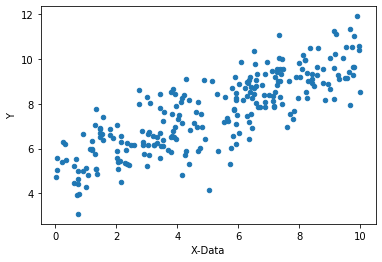

In [10]:
my_data.sample(n=250).plot(kind='scatter',x='X-Data',y='Y')

In [11]:
batch_size = 8

In [12]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [13]:
xph = tf.compat.v1.placeholder(tf.float32,[batch_size])
yph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [14]:
# Model 
y_model = m*xph + b

In [15]:
# Cost Function
error = tf.reduce_sum(tf.square(yph-y_model))

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [17]:
init = tf.global_variables_initializer()

In [18]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b = sess.run([m,b])

In [20]:
model_b

4.9861093

In [21]:
y_hat = x_data*model_m+model_b

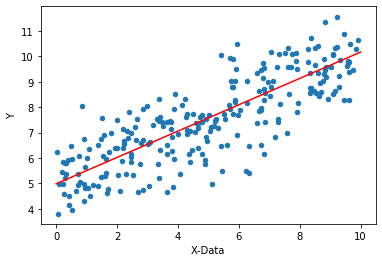

In [22]:
my_data.sample(n=250).plot(kind='scatter',x='X-Data',y='Y')
plt.plot(x_data,y_hat,'r')

In [23]:
# Estimator API
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [24]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Bhupal\\AppData\\Local\\Temp\\tmp_he4wylk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
# Train Test split
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=0)

In [32]:
x_train.shape

(700000,)

In [34]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [35]:
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [36]:
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [37]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Bhupal\AppData\Local\Temp\tmp_he4wylk\model.ckpt.
INFO:tensorflow:loss = 294.37723, step = 1
INFO:tensorflow:global_step/sec: 573.828
INFO:tensorflow:loss

In [38]:
train_matrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-16T18:05:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Bhupal\AppData\Local\Temp\tmp_he4wylk\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 1.87797s
INFO:tensorflow:Finished evaluation at 2020-05-16-18:05:53
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1399665, global_step = 1000, label/mean = 7.565688, loss = 4.559866, prediction/mean = 7.3263

In [40]:
eval_matrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-16T18:07:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Bhupal\AppData\Local\Temp\tmp_he4wylk\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 1.30942s
INFO:tensorflow:Finished evaluation at 2020-05-16-18:07:33
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1399665, global_step = 1000, label/mean = 7.565688, loss = 4.559866, prediction/mean = 7.3263

In [41]:
input_fu_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [44]:
list(estimator.predict(input_fn=input_fu_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Bhupal\AppData\Local\Temp\tmp_he4wylk\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.2033567], dtype=float32)},
 {'predictions': array([4.891677], dtype=float32)},
 {'predictions': array([5.5799975], dtype=float32)},
 {'predictions': array([6.2683177], dtype=float32)},
 {'predictions': array([6.9566383], dtype=float32)},
 {'predictions': array([7.6449585], dtype=float32)},
 {'predictions': array([8.333279], dtype=float32)},
 {'predictions': array([9.021599], dtype=float32)},
 {'predictions': array([9.709919], dtype=float32)},
 {'predictions': array([10.398239], dtype=float32)}]

In [45]:
predictions = []
for x in estimator.predict(input_fn=input_fu_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Bhupal\AppData\Local\Temp\tmp_he4wylk\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [47]:
predictions

[array([4.2033567], dtype=float32),
 array([4.891677], dtype=float32),
 array([5.5799975], dtype=float32),
 array([6.2683177], dtype=float32),
 array([6.9566383], dtype=float32),
 array([7.6449585], dtype=float32),
 array([8.333279], dtype=float32),
 array([9.021599], dtype=float32),
 array([9.709919], dtype=float32),
 array([10.398239], dtype=float32)]

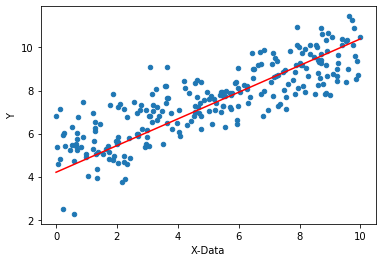

In [50]:
my_data.sample(n=250).plot(kind='scatter',x='X-Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')